### You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

### Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

### Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

### Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [1]:
#importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statsmodels.stats.proportion
import math
import warnings
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score


# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
#importng the target csv file
data = pd.read_csv('/Users/manueltanguma/Downloads/heart.csv', encoding='latin-1')

### This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Attribute Information: 
#### 1. age 
#### 2. sex 
#### 3. chest pain type (4 values) 
#### 4. resting blood pressure 
#### 5. serum cholestoral in mg/dl 
#### 6. fasting blood sugar > 120 mg/dl
#### 7. resting electrocardiographic results (values 0,1,2)
#### 8. maximum heart rate achieved 
#### 9. exercise induced angina 
#### 10. oldpeak = ST depression induced by exercise relative to rest 
#### 11. the slope of the peak exercise ST segment 
#### 12. number of major vessels (0-3) colored by flourosopy 
#### 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
#addressing column names to make them more readable
data.columns = [
    'age', 'sex', 'chest_pain_type', 'resting_bp',
    'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_hr',
    'exer_ind_angina', 'exer_st_changes', 'slope', 'fluoro_vessels', 'thallium',
    'target'
    ]

In [4]:
data.head(5)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_hr,exer_ind_angina,exer_st_changes,slope,fluoro_vessels,thallium,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                    303 non-null int64
sex                    303 non-null int64
chest_pain_type        303 non-null int64
resting_bp             303 non-null int64
cholesterol            303 non-null int64
fasting_blood_sugar    303 non-null int64
resting_ecg            303 non-null int64
max_hr                 303 non-null int64
exer_ind_angina        303 non-null int64
exer_st_changes        303 non-null float64
slope                  303 non-null int64
fluoro_vessels         303 non-null int64
thallium               303 non-null int64
target                 303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
#changing exer_st_changes from float64 to int64
data.exer_st_changes = data.exer_st_changes.astype(int)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                    303 non-null int64
sex                    303 non-null int64
chest_pain_type        303 non-null int64
resting_bp             303 non-null int64
cholesterol            303 non-null int64
fasting_blood_sugar    303 non-null int64
resting_ecg            303 non-null int64
max_hr                 303 non-null int64
exer_ind_angina        303 non-null int64
exer_st_changes        303 non-null int64
slope                  303 non-null int64
fluoro_vessels         303 non-null int64
thallium               303 non-null int64
target                 303 non-null int64
dtypes: int64(14)
memory usage: 33.2 KB


In [9]:
#checking for missing data
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_hr                 0
exer_ind_angina        0
exer_st_changes        0
slope                  0
fluoro_vessels         0
thallium               0
target                 0
dtype: int64

In [10]:
#taking a look at the data with the new columns
data.head(10)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_hr,exer_ind_angina,exer_st_changes,slope,fluoro_vessels,thallium,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1117a05c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115cc9b70>]], dtype=object)

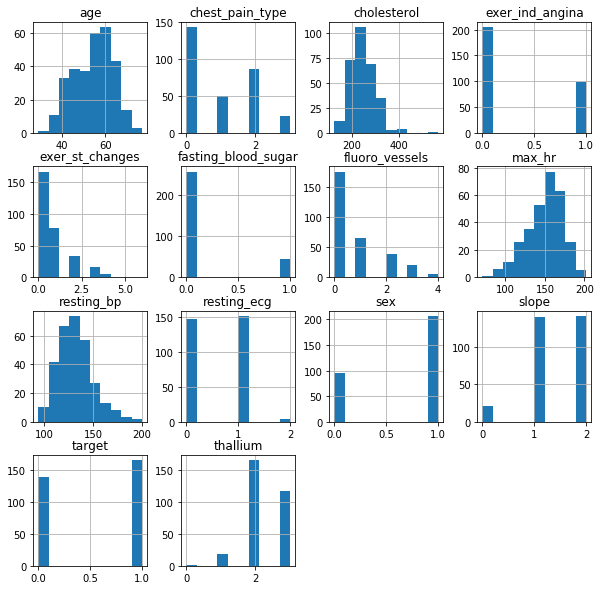

In [11]:
#plotting histogram 
data.hist(figsize=(10, 10))

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


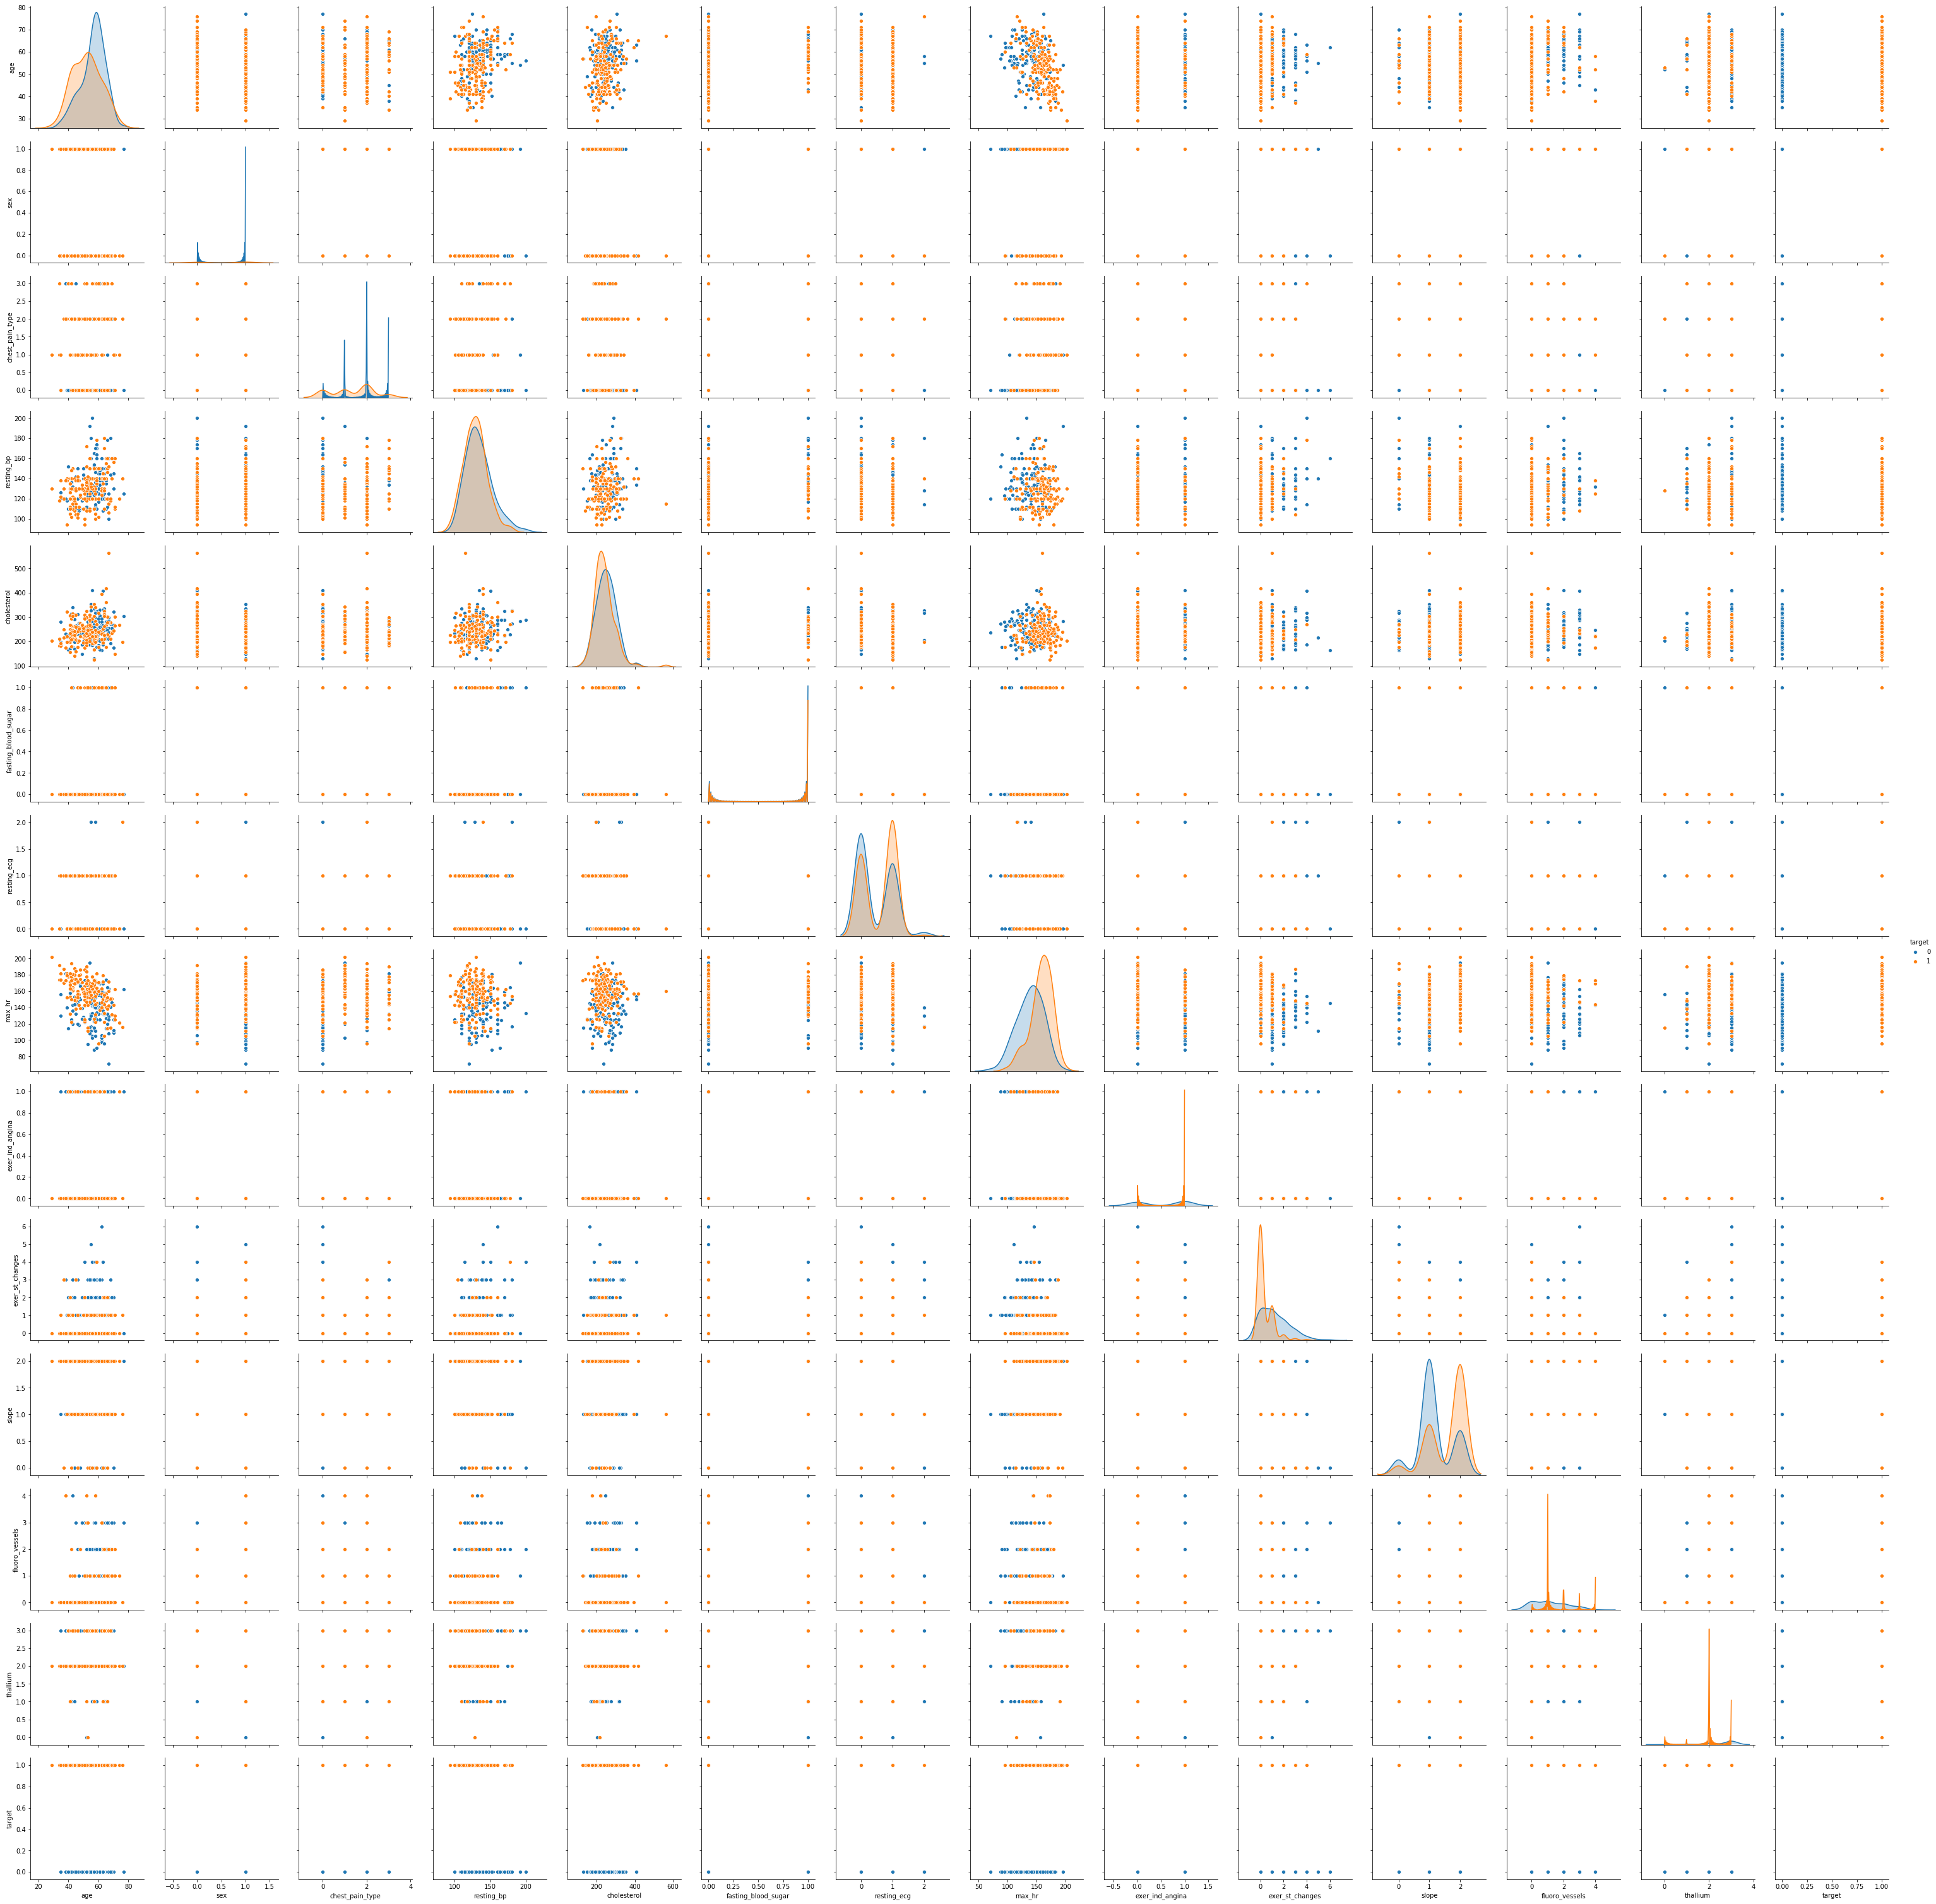

In [12]:
#seaborn pairplot
sns.pairplot(data, hue = 'target', height = 3)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


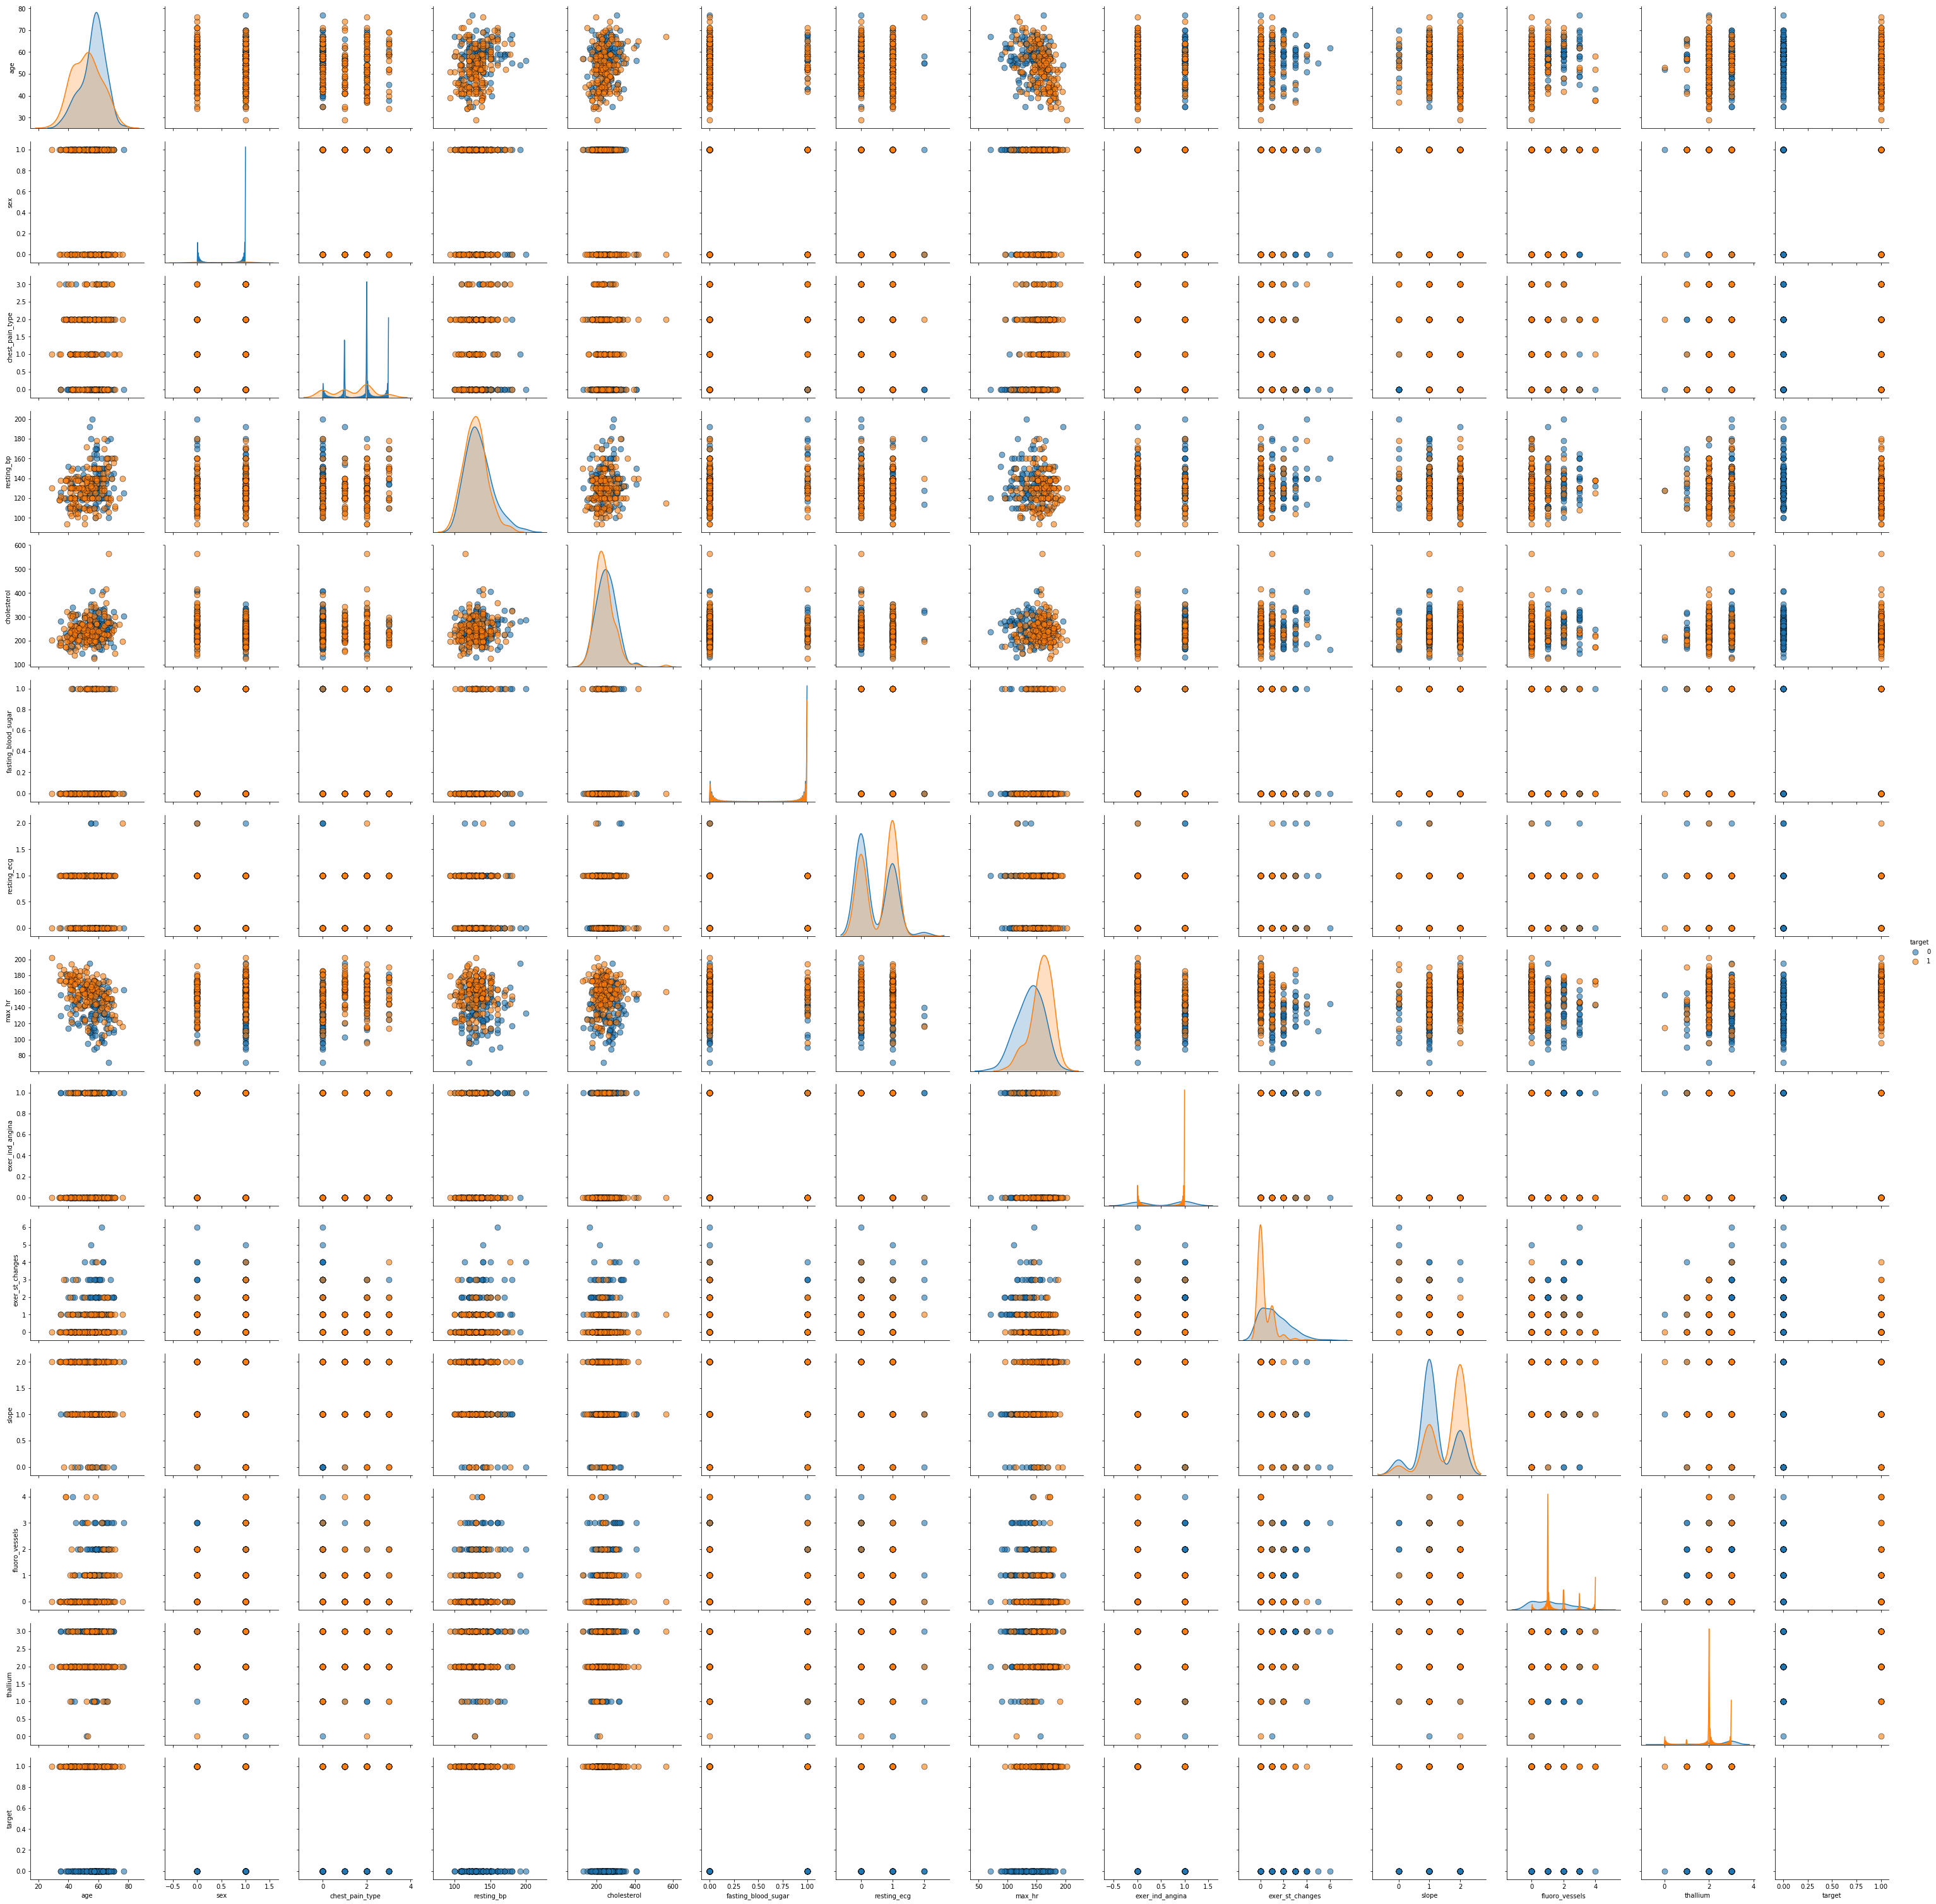

In [13]:
#seaborn plot with kde plot for diag_kind
sns.pairplot(data, hue = 'target', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3)

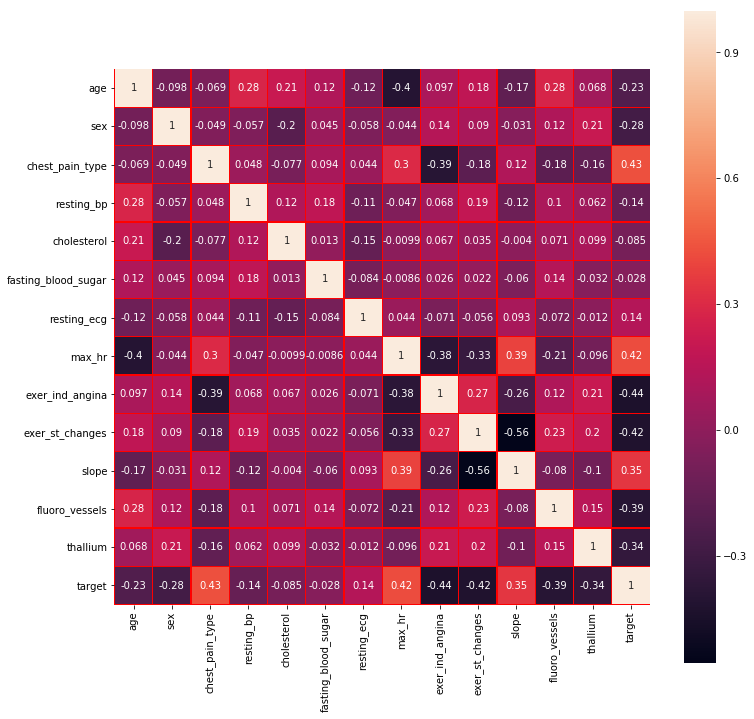

In [14]:
#seaborn heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), linewidth=0.2, vmax=1.0, square=True, linecolor='red', annot=True)

In [15]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
#extract the features and labels
#features = X
#features = y
features = data.iloc[:, 0:-1].values
labels = data.iloc[:, -1].values

In [17]:
#cross-validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

### Linear Regression

In [18]:
#creates linear regression class object
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_pred = linear_reg.predict(X_test)

In [20]:
print (linear_reg.coef_)
print (linear_reg.intercept_)

[ 0.00104043 -0.22770371  0.09392591 -0.00158902 -0.00049745 -0.0731672
  0.00760055  0.00301487 -0.16287295 -0.07678727  0.04836248 -0.10912106
 -0.08695299]
0.769205280946


In [21]:
# a score of 1.0 would be the best possible score, a score of 0.0 indicates a constant model that always 
#predicts the expected value of y, disregarding the input features.
print ('Test-score:', linear_reg.score(X_test, y_test))
print ('Train-score:', linear_reg.score(X_train, y_train))

Test-score: 0.436583185228
Train-score: 0.531275215069


### .score - returns the coefficient of determination R^2 of the prediction.

#### The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.



In [22]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.140701119786
RMSE 0.375101479317


#### The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. ... It's called the mean squared error as you're finding the average of a set of errors.

#### MSE is nothing but your loss function. It is used to compare different estimators by comparing the value of MSE of them. Or also called as variance, which gives you intuition of the best fit estimate. Lesser the MSE => smaller is the error => better the estimator.

#### Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [23]:
print ('The R^2 score is:', metrics.r2_score(y_test, y_pred))

The R^2 score is: 0.436583185228


#### R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. ... For instance, small R-squared values are not always a problem, and high R-squared values are not necessarily good!

#### R-squared is a statistical measure of how close the data are to the fitted regression line. ... 0% indicates that the model explains none of the variability of the response data around its mean. 100% indicates that the model explains all the variability of the response data around its mean.

### KNN

In [24]:
print (len(y_train))

212


In [25]:
#obtaining the n_neighbors number to best fit the model, given the data
import math
math.sqrt(len(y_train))

14.560219778561036

In [26]:
#creates knn class object
knn = neighbors.KNeighborsRegressor(n_neighbors=13)

In [27]:
#fitting X and y
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=13, p=2,
          weights='uniform')

In [28]:
y_predknn = knn.predict(X_test)

In [29]:
# a score of 1.0 would be the best possible score, a score of 0.0 indicates a constant model that always 
#predicts the expected value of y, disregarding the input features.
print ('Test-score:', knn.score(X_test, y_test))
print ('Train-score:', knn.score(X_train, y_train))

Test-score: 0.166790656152
Train-score: 0.21297934222


In [30]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_predknn))
print ('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_predknn)))

MSE: 0.208075947721
RMSE 0.456153425638


In [33]:
print ('The R^2 score is:', metrics.r2_score(y_test, y_predknn))

The R^2 score is: 0.166790656152


In [34]:
# loading library
#from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
#knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
#knn.fit(X_train, y_train)

# predict the response
#pred = knn.predict(X_test)

#evaluate accuracy
print ('The accuracy score is:', metrics.accuracy_score(y_test, y_predknn))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 

#### Linear regression assumes a linear functional form for f(X).  There are some advantages and disadvantages to this.  Some advantages are that it is easy to fit and also easy to interpret.  When we know the relationship between the independent and dependent variable have a linear relationship, this algorithm is the best to use because it’s the least complex to compared to other algorithms that also try finding the relationship between independent and dependent variable.  Some disadvantages would be that linear regression makes strong assumptions about the form of f (X).  For example, what happens if the true relationship between features and labels is not a linear relationship?  Then any conclusions drawn from the model would be dubious.  And of course, there are rarely instances in life in which a set of data fit exactly a linear model.  KNN does not assume an explicit form for f(X), which makes it a more flexible approach.
#### The data examined here relates to various factors associated in people with either the presence or absence of heart disease, in this case a 1 indicating the presence of heart disease and a 0 indicating that it is absent.  The data was used in a study to predict whether a person would have heart disease or not. Having a medical background, I intimately understand each of the features and can say that each feature on it's own would give an approximation on the question of "Does this person have heart disease?', so as a whole I would say that the features in this dataset are not just a rag-tag group of features just thrown together, but a grouped set that would lead a clinician to a pretty good assumption. 
#### I would also assume that the occurrence and aggregation of 14 different features associated with heart disease would not behave in a linear form for the purposes of prediction.  In this case it is interesting to note that the linear regression model seems to be the better predictor.  The MSE is 0.14, the RMSE is 0.38, and the R^2 is 0.44.  The KNN classifier seems to do a poorer job with an MSE of 0.20, a RMSE of 0.45, and an R^2 score of 0.16.  I believe the key metric is the R^2 score of 0.44 vs 0.16.  The model seems to fit the data better in the linear regression model.  
#### We have to take all of this with a grain of salt, since the KNN classifier is a nonparametric model and the linear regression classifier is a parametric model.  The KNN classifier is a non parametric and instance-based learning algorithm.  Non-parametric means it makes no explicit assumptions about the functional form of h, avoiding the dangers of mismodeling the underlying distribution of the data. For example, suppose our data is highly non-Gaussian but the learning model we choose assumes a Gaussian form. In that case, our algorithm would make extremely poor predictions.  Instance-based learning means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only when a query to our database is made (i.e. when we ask it to predict a label given an input), will the algorithm use the training instances to spit out an answer.
#### I would favor the linear regression model in this case, and the reason is that, the nature of the data itself, if we were to isolate each feature, each feature would tell me if this person has heart disease or not.  Of course, not with accuracy, but I would lean towards one side or the other.  Therefore, in my mind, I would think that there is an established linear relationship between the two.  The worse a marker is, the worse you are.  And this is exactly why, the linear regression model outperforms the kNN classifier.  There is a linear relationship between the features and the outcome.